Solution computed in 3.31e+01 seconds


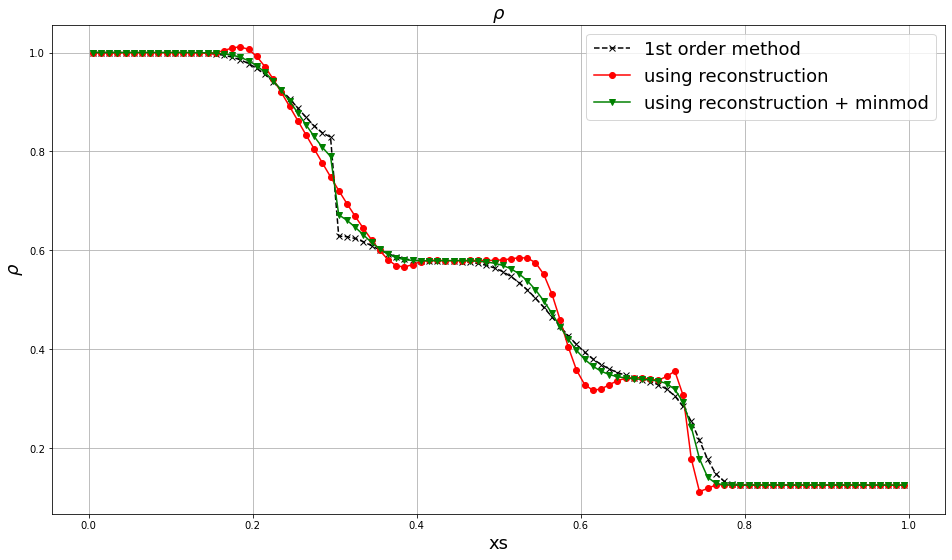

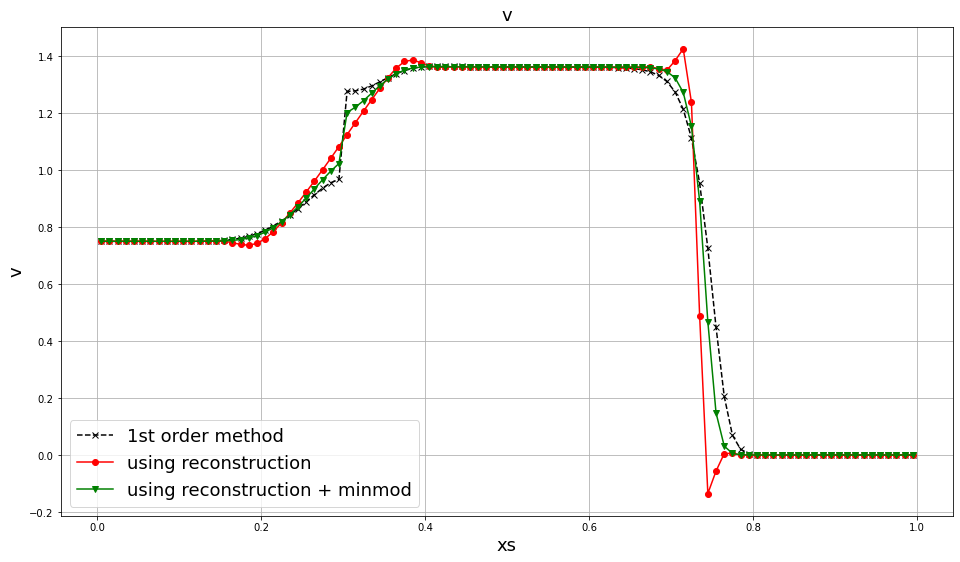

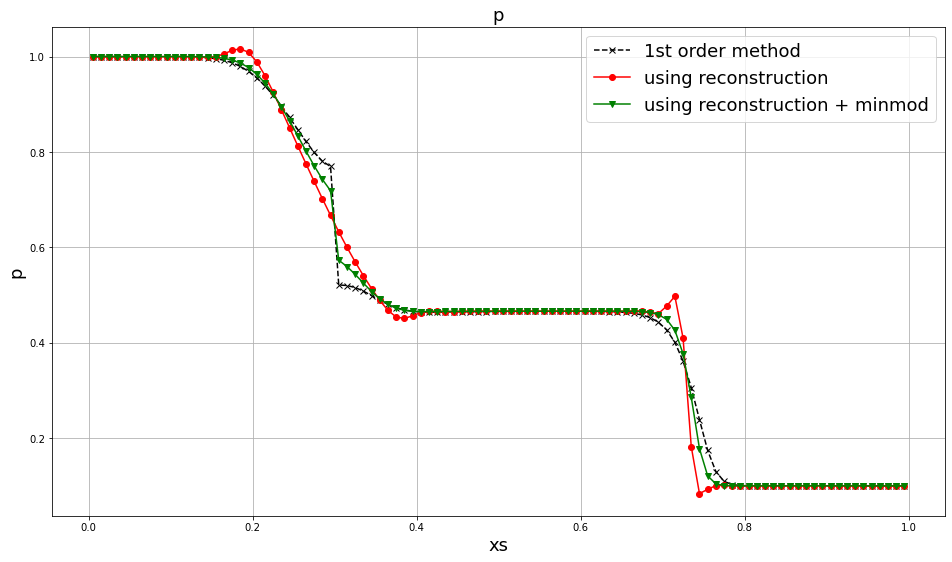

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 11:43:59 2020

@author: alexc
"""
import models
from solver import solver
import numpy as np
from matplotlib import pyplot as plt
import time
import os

euler_model = models.Euler(wave_speed_estimate_type = 'Einfeldt')

# Define left and right states for the test Riemann problem
VL = np.array([1., 0.75, 1.0])
VR = np.array([0.125, 0.0, 0.1])

# Point of discontinuity 
x0 = 0.3
T_final = 0.2

UL = euler_model.prim2cons(VL)
UR = euler_model.prim2cons(VR)
# Define function for initial conditions
def u0_euler(x):
    U0 = np.zeros((len(x), 3))
    mask = x <= x0
    U0[mask, :] = UL
    mask = x > x0
    U0[mask, :] = UR

    return U0


xx = np.linspace(0, 1, 200)
U0 = u0_euler(xx)
# print("U0.shape = ", U0.shape)
# plt.plot(xx, U0[:, 0])

t1 = time.time()
U0, xs = solver(euler_model, nx = 100, nt=800, T = T_final, u0_fun = u0_euler,
               xl = 0., xr = + 1., bc_type = 'transparent')
U_recon, xs = solver(euler_model, nx = 100, nt=800, T = T_final, u0_fun = u0_euler,
               xl = 0., xr = + 1., bc_type = 'transparent', recon = 1)
U_minmod, xs = solver(euler_model, nx = 100, nt=800, T = T_final, u0_fun = u0_euler,
               xl = 0., xr = + 1., bc_type = 'transparent', recon = 1, mmod = 1)
t2 = time.time()
print ('Solution computed in {0:5.2e} seconds'.format(t2 - t1))

V0 = np.array([euler_model.cons2prim(u) for u in U0])
V_recon = np.array([euler_model.cons2prim(u) for u in U_recon])
V_minmod = np.array([euler_model.cons2prim(u) for u in U_minmod])

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

ax.plot(xs, V0[:, 0], label = '1st order method', marker = 'x', color = 'black', linestyle = '--')
ax.plot(xs, V_recon[:, 0], label = 'using reconstruction', marker = 'o', color = 'red')
ax.plot(xs, V_minmod[:, 0], label = 'using reconstruction + minmod', marker = 'v', color = 'green')

plt.ylabel(r'$\rho$', fontsize = 18)
plt.xlabel('xs', fontsize = 18)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 18)
plt.title(r'$\rho$', fontsize = 18)
os.chdir(os.getcwd() + "\outData")
plt.savefig('Density.jpg')
os.chdir(os.getcwd().replace("\outData", ""))

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

ax.plot(xs, V0[:, 1], label = '1st order method', marker = 'x', color = 'black', linestyle = '--')
ax.plot(xs, V_recon[:, 1], label = 'using reconstruction', marker = 'o', color = 'red')
ax.plot(xs, V_minmod[:, 1], label = 'using reconstruction + minmod', marker = 'v', color = 'green')

plt.ylabel('v', fontsize = 18)
plt.xlabel('xs', fontsize = 18)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 18)
plt.title('v', fontsize = 18)
os.chdir(os.getcwd() + "\outData")
plt.savefig('Velocity.jpg')
os.chdir(os.getcwd().replace("\outData", ""))

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

ax.plot(xs, V0[:, 2], label = '1st order method', marker = 'x', color = 'black', linestyle = '--')
ax.plot(xs, V_recon[:, 2], label = 'using reconstruction', marker = 'o', color = 'red')
ax.plot(xs, V_minmod[:, 2], label = 'using reconstruction + minmod', marker = 'v', color = 'green')

plt.ylabel('p', fontsize = 18)
plt.xlabel('xs', fontsize = 18)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 18)
plt.title('p', fontsize = 18)
os.chdir(os.getcwd() + "\outData")
plt.savefig('Pressure.jpg')
os.chdir(os.getcwd().replace("\outData", ""))

